# What is Logistic Regression?

**Logistic Regression** solves **classification** problems.<br>
Usually we use this method for **binary** classification.<br>
Used for **spam detection** of emails.This is a binary classification problem as there are two cases.The email can be a SPAM or NOT.<br>
Also used by banks for predicting whether a customer will default on a loan or not.<br>
**OUTPUT OF THE DEPENDENT VARIABLE IS DICRETE**.
**Logistic Regression** is a **discrete model** that assigns **probabilities to given outcomes**.<br>
The output is a probability that the given input belongs to a certain class.

Let's consider the problem of **credit risk**.<br>
The problem: Create a **model** that gives the **probability of his/her credit debt being paid back by the client**.<br>
Here the $x-axis$ will be the *balance on the credit card* and the $y-axis$ is a *binary class(Will pay Back OR Will Not Pay Back)*.<br>

**Linear Regression** is not a good solution for this problem.<br>
To fit the description of the problem we would like to end up with a **sigmod funtion** so that we can assign probabilities to given outcomes.

## Sigmoid function 

$f(x) = \frac{1}{1 + e^{-x}}$<br>
<br>
Using this functtion:<br>
**->** We are able to solve binary classication problems.<br>
**->** It outputs a value between 0 and 1.<br>
**->** The output can be interpreted as a probability.

**Graph of the sigmoid function**.

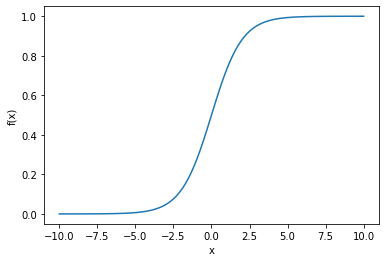

In [87]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
y = 1/(1 + np.exp(-x)) 
  
plt.plot(x, y)
plt.xlabel("x") 
plt.ylabel("f(x)") 
  
plt.show() 

###  We Use Bayes Theorem

$P(HYPOTHESIS \ given \ EVIDENCE) = P(H|E) = \frac{P(H) \  P(E|H)}{P{E}} = \frac {P(H) \  P(E|H)} {{P(H) \ P(E|H)} \ + \ P(\neg H) \ P(E|\neg H)}$

### We use a modified sigmoid function

We compute the **probability for a default given the balance $x$**.<br>
<br>
$p(x) = P(y=1|x=balance)$<br>
<br>
Here p(x) comes out to be $\frac{1}{1 + e^{-(b_0 + b_1*x)}}$<br>
<br>
$b_0$ and $b_1$ are the model parameters.
We can solve this using **gradient descent** or **maximum likelihood method**.

### We use Logit Transformation 

$\ln (\frac{p(x)}{1 \ - \ p(x)}) \ = \ b_0 \ + \ b_1x  $<br>
<br>
**->** The point of the **logit transformation** is to make our **logistic regression** linear. So logistic regression is a linear regression on the logit transformation.<br>
**->** It is a **generalized linear model** : Not because the estimated probability of the response is linear but beacuse the logit of the estimated probability response is a linear function of the parameters.  

### Multinomial Logistic Regression

We have **multiple x parameters**. For example balance,age,demograhics,loan to income ratio etc.<br>
<br>
$p(x) = \frac{1}{1 + e^{-(b_0 + b_1*x_1 + ... + b_n*x_n)}}$ <br>
<br>
Usually we only use Logistic Regression for **BINARY CLASSIFICATION**.

### Maximum-Likelihood Method

It is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters.<br>
<br>
The method is based on a **likelihood function**.<br>
**"Logarithmic likelihood-function"**.<br>
<br>
$ l(\beta,x) = \ln L(\beta,x) $<br>
**where** $L(\beta,x)$ is the likelihood-function.<br>
We are after optimal values $\beta$ values that maximize the likelihood-function. <br>
<br>

$ L(\overrightarrow{\beta})  = \prod_{i=1}^{n} p(y_i,x_i)^{y_i} \ (1 - p(y_i,x_i))^{1-y_i} $<br>
<br>
$p(y_i,\overrightarrow x) = \frac{1}{1 + e^{-(\overrightarrow x_i'*\beta)}}$ <br>
<br>
This estimate is obtained using the iterative algorithm **Newton Raphson Method**.

### CODE

#### SIMPLE EXAMPLE

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

We are just considering some points for now.

In [89]:
# p i = 1 / 1 + exp[ - ( b0 + b1 * x )]

x1 = np.array([0,0.6,1.1,1.5,1.8,2.5,3,3.1,3.9,4,4.9,5,5.1])
y1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

x2 = np.array([3,3.8,4.4,5.2,5.5,6.5,6,6.1,6.9,7,7.9,8,8.1])
y2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

#this is the dataset combining x1 and x2 And y1 and y2
X = np.array([[0],[0.6],[1.1],[1.5],[1.8],[2.5],[3],[3.1],[3.9],[4],[4.9],[5],[5.1],[3],[3.8],[4.4],[5.2],[5.5],[6.5],[6],[6.1],[6.9],[7],[7.9],[8],[8.1]])
y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1])

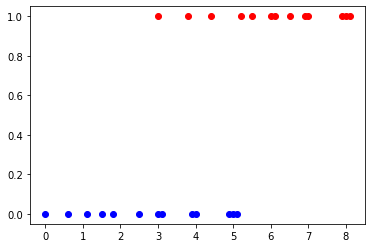

In [90]:
plt.plot(x1,y1,"ro",color="blue")
plt.plot(x2,y2,"ro",color="red")
plt.show()

In [91]:
#Lets train a model for these points!
model = LogisticRegression(solver='lbfgs')
model.fit(X,y)

#Lets print the beta values
print(f"b0 is : {model.intercept_}")
print(f"b1 is : {model.coef_}")

b0 is : [-4.50163542]
b1 is : [[1.00401882]]


**Now we can use this trained model to make predictions.**

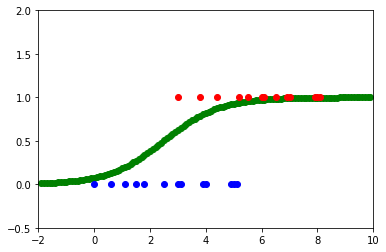

In [92]:
#Let's visualise the problem
def logistic(classifier,x):
    return 1/(1 + np.exp(-(model.intercept_ + model.coef_ *x)))

for i in range(1,120):
    plt.plot(i/10.0 - 2,logistic(model,i/10.0),"ro",color="green")
    
plt.plot(x1,y1,"ro",color="blue")
plt.plot(x2,y2,"ro",color="red")    
plt.axis([-2,10.0,-0.5,2])
plt.show()

**The output is binary , either 0 or 1.**

In [93]:
#Let's make a prediction with our model
pred = model.predict([[1]])
prob_pred = model.predict_proba([[1]])
print(f"The model's predicition for input 1 is {pred}")
print(f"The model's PROBABILITY predicition for input 1 is {prob_pred}")

The model's predicition for input 1 is [0]
The model's PROBABILITY predicition for input 1 is [[0.97061988 0.02938012]]


**We can say with 97% certainty that if our input is 1 then it belongs to the "0" class.**

#### EXAMPLE WITH CREDIT SCORES 

In [94]:
#Let's import the remaining requirements
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [95]:
credit_data = pd.read_csv("credit_data.csv")
#Let's analyze the dataset
print(credit_data.describe())

          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.281668    52.596993   6432.410625     0.147585   
max    2000.000000  69995.685578    63.971796  13766.051239     0.199938   

           default  
count  2000.000000  
mean      0.141500  
std       0.348624  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


**Study mean, variance,standard deviation, co-variance and correlation from the slides or the net.**

In [96]:
#Let's print the correlation matrix
print(credit_data.corr())

          clientid    income       age      loan       LTI   default
clientid  1.000000  0.039280 -0.030341  0.018931  0.002538 -0.020145
income    0.039280  1.000000 -0.034984  0.441117 -0.019862  0.002284
age      -0.030341 -0.034984  1.000000  0.006561  0.021588 -0.444765
loan      0.018931  0.441117  0.006561  1.000000  0.847495  0.377160
LTI       0.002538 -0.019862  0.021588  0.847495  1.000000  0.433261
default  -0.020145  0.002284 -0.444765  0.377160  0.433261  1.000000


**Analyze the dataset before applying any machine learning algorithm**

In [97]:
features = credit_data[["income","age","loan"]]
target = credit_data.default
#Let's do a train-test split 70% of data is trianing data and the remaining is testing data
feature_train, feature_test, target_train, target_test = train_test_split(features,target,test_size=0.3)

In [98]:
#Let's train the model
model = LogisticRegression(solver='lbfgs')
model.fit(feature_train,target_train)

#let's make predictions using the test dataset
predictions = model.predict(feature_test)

#print the beta values predicted that fit the model
print(f"Beta values [b1,b2,b3] are : {model.coef_}")
print(f"Intercept value or b0 is : {model.intercept_}")
print()

#Now calculate the accuracy
print("The confusion matrix is :")
print(confusion_matrix(target_test,predictions))
print()
print(f"The accuracy of out model is : {accuracy_score(target_test,predictions)}")

Beta values [b1,b2,b3] are : [[-5.57808697e-05 -1.40960965e-01  9.04773719e-04]]
Intercept value or b0 is : [-0.00064464]

The confusion matrix is :
[[502  13]
 [ 43  42]]

The accuracy of out model is : 0.9066666666666666


**WE CAN FURTHER IMPROVE THIS ACCURACY!!!**

## Cross Validation

Through **train-test-split** we computed the acuuracy for the data we had.<br>
But we want to see how the model predicts new data.<br>
<br>
**Overfitting**<br>
Overfitting means that the trained model predicts *well* for the training dataset but yields *poor* results on the test datset beacuse the model is too **complex**.<br>
The model learns the **noise**.<br>
<br>
**Underfitting**<br>
Model does not fit well on the training dataset.This means that the model is too **simple**. 

### K-Folds Cross Validation 

Helps to avoid underfitting and overfitting.<br>
The aim is to generalise the model to new datasets with the same accuracy.<br>
We use **all the data for training**.<br><br>
We split the data into **k** folds.<br>
**-->** We run **k** seperate learning experiments.**k-1** folds for training and **1** for testing.<br>
**-->** We average the results from **k** experiments.<br>
**-->** All observations are used for both training and validation and each observation is used for validation exactly once.<br>
<br>
*for i in range(k):<br>
&nbsp;&nbsp;&nbsp;&nbsp;fold = len(data)/k<br>
&nbsp;&nbsp;&nbsp;&nbsp;range_of_fold = (i * fold,fold )<br>
&nbsp;&nbsp;&nbsp;&nbsp;testing = data(range_of_fold)<br>
&nbsp;&nbsp;&nbsp;&nbsp;training = data(remaining)*<br><br>

#### CROSS VALIDATION EXAMPLE WITH CREDIT SCORES 

In [99]:
#get the remaining imports
from sklearn.model_selection import cross_validate

In [100]:
#let's use the same same credit_dat.csv
#We are using the same features and targets as before
#ML alg. handle arrays
X_values = np.array(features).reshape(-1,3)
y_values = np.array(target)

In [101]:
model_C_V = LogisticRegression(solver='lbfgs')
predicted_C_V = cross_validate(model_C_V,X_values,y_values,cv=5)

#predicted_C_V will be a dict.
#predicted_C_V["test_score"] will give us the accuracy calculated for each fold
print(predicted_C_V["test_score"])

[0.9127182  0.9201995  0.9        0.91478697 0.93734336]


In [103]:
#let's calculate the average of these scores
print(np.mean(predicted_C_V["test_score"]))

0.9170096063100394


**SO WE SEE THAT OUR ACCURACY USING CROSS VALIDATION HAS "Increased  1.7%" to 91.70%**

--------------------------------------------------------------------------------------- **END** ------------------------------------------------------------------------